#data contains power for multiple ACs at some hotel in Gurgaon.


#1.Identify patterns/trends in the data?
#2.Which AC was used the most/least?


In [ ]:
#@title Import packages


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#@title load the data

In [107]:
data=pd.read_csv("/content/AC_Data.csv")
data.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [108]:
#SHAPE OF THE DATAFRAME
data.shape

(87840, 19)

In [109]:
#COLUMNS OF THE DATAFRAME
data.columns

Index(['0', 'AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8',
       'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16',
       'AC 17', 'AC 18'],
      dtype='object')

In [110]:
#RENAMING THE COLUMNS FOR BETTER UNDERSTANDING
data=data.rename(columns={'0':'Date','AC 1':'AC1','AC 2':'AC2','AC 3':'AC3','AC 4':'AC4','AC 5':'AC5','AC 6':'AC6','AC 7':'AC7','AC 8':'AC8','AC 9':'AC9','AC 10':'AC10','AC 11':'AC11','AC 12':'AC12','AC 13':'AC13','AC 14':'AC14','AC 15':'AC15','AC 16':'AC16','AC 17':'AC17','AC 18':'AC18'})
data.head()


,Date,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [111]:
#TO CHECK IF WE HAVE NaN VALUES 
data.isna().sum()

Date        0
AC1     44132
AC2     44129
AC3     44127
AC4     44136
AC5     44124
AC6     44123
AC7     44161
AC8     44136
AC9     44186
AC10    44150
AC11    44170
AC12    44127
AC13    44121
AC14    44144
AC15    44125
AC16    44130
AC17    44126
AC18    44117
dtype: int64

In [112]:
# DROP THE NaN ROWS
data=data.dropna()
data

,Date,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87831,2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
87833,2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


In [113]:
#SPLITTING THE DATE AND TIME AND STORING THE DATE INTO SEPERATE COLUMN
dat=data['Date'].apply(lambda x : x.split()[0] )
data.insert(1,'date',dat)

In [114]:
data.head()

,Date,date,AC1,AC2,AC3,AC4,AC5,AC6,AC7,AC8,AC9,AC10,AC11,AC12,AC13,AC14,AC15,AC16,AC17,AC18
0,2019-08-01 00:00:00,2019-08-01,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,2019-08-01,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,2019-08-01,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,2019-08-01,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,2019-08-01,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474


In [ ]:
#@title 1.Identify patterns/trends in the data?


####AVERAGE USE OF AC'S PER DAY

In [115]:
# GENERATING THE AVERAGE OF EACH AC'S PER DAY
meanAC1=data.groupby('date')['AC1'].mean()
meanAC2=data.groupby('date')['AC2'].mean()
meanAC3=data.groupby('date')['AC3'].mean()
meanAC4=data.groupby('date')['AC4'].mean()
meanAC5=data.groupby('date')['AC5'].mean()
meanAC6=data.groupby('date')['AC6'].mean()
meanAC7=data.groupby('date')['AC7'].mean()
meanAC8=data.groupby('date')['AC8'].mean()
meanAC9=data.groupby('date')['AC9'].mean()
meanAC10=data.groupby('date')['AC10'].mean()
meanAC11=data.groupby('date')['AC11'].mean()
meanAC12=data.groupby('date')['AC12'].mean()
meanAC13=data.groupby('date')['AC13'].mean()
meanAC14=data.groupby('date')['AC14'].mean()
meanAC15=data.groupby('date')['AC15'].mean()
meanAC16=data.groupby('date')['AC16'].mean()
meanAC17=data.groupby('date')['AC17'].mean()
meanAC18=data.groupby('date')['AC18'].mean()

In [116]:
#CONCATINATING AVERAGE USAGE OF AC'S DATA TO SINGLE 
data_n=pd.concat([meanAC1, meanAC2,meanAC3,meanAC4,meanAC5,meanAC6, meanAC7,meanAC8,meanAC9,meanAC10,meanAC11, meanAC12,meanAC13,meanAC14,meanAC15,meanAC16,meanAC17,meanAC18], axis=1)

Text(0.5, 0, 'Time')

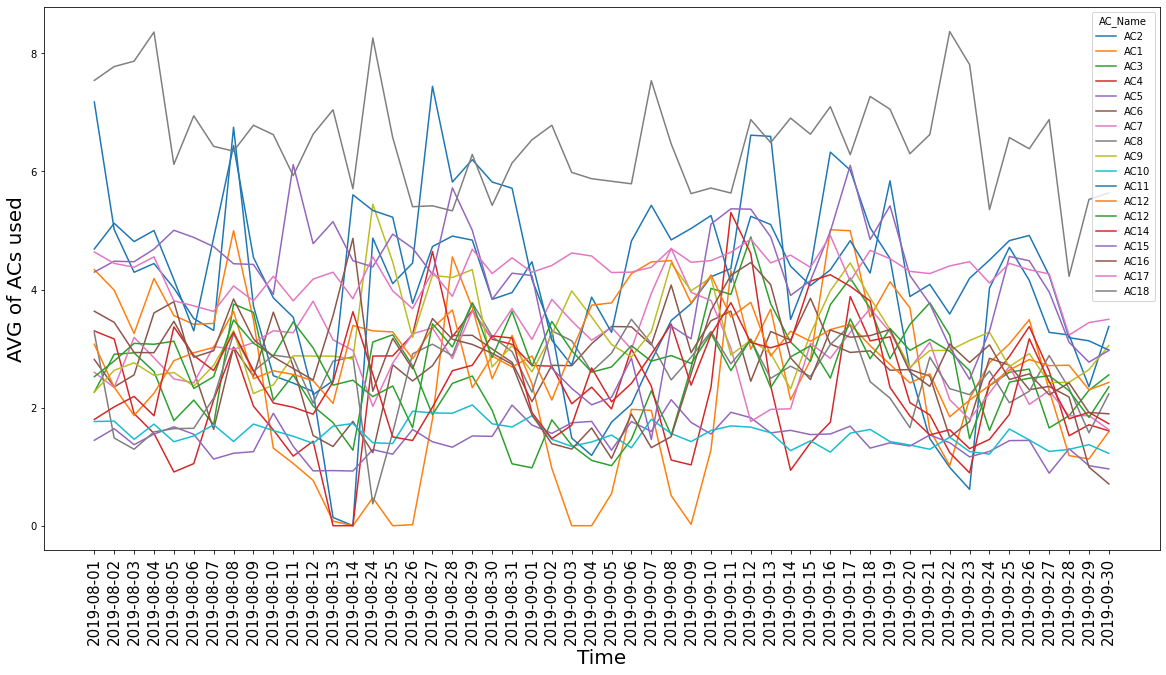

In [117]:
#PLOTING THE AVERAGE USAGE OF ALL AC'S DATA 

plt.figure(figsize=(20,10))
#plot each series
plt.xticks(rotation=90,fontsize=15)


plt.plot(data_n['AC2'],label='AC2')
plt.plot(data_n['AC1'],label='AC1')
plt.plot(data_n['AC3'],label='AC3')
plt.plot(data_n['AC4'],label='AC4')
plt.plot(data_n['AC5'],label='AC5')
plt.plot(data_n['AC6'],label='AC6')
plt.plot(data_n['AC7'],label='AC7')
plt.plot(data_n['AC8'],label='AC8')
plt.plot(data_n['AC9'],label='AC9')
plt.plot(data_n['AC10'],label='AC10')
plt.plot(data_n['AC13'],label='AC11')
plt.plot(data_n['AC14'],label='AC12')
plt.plot(data_n['AC12'],label='AC12')
plt.plot(data_n['AC11'],label='AC14')
plt.plot(data_n['AC15'],label='AC15')
plt.plot(data_n['AC16'],label='AC16')
plt.plot(data_n['AC17'],label='AC17')
plt.plot(data_n['AC18'],label='AC18')

plt.legend(title='AC_Name')
plt.ylabel('AVG of ACs used', fontsize=20)
plt.xlabel('Time', fontsize=20)


In [118]:
#SUBPLOTTING AVERAGE USAGE OF EACH AC'S FOR MORE CLEAR UNDERSTADING
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=10, cols=2,
    subplot_titles=("AC1", "AC2", "AC3", "AC4", "AC5", "AC6", "AC7", "AC8", "AC9", "AC10", "AC11", "AC12", "AC13", "AC14", "AC15", "AC16", "AC17", "AC18"))

fig.add_trace(go.Scatter(x=data_n.index,y=data_n.AC1),
              row=1, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC2),
              row=1, col=2)

fig.add_trace(go.Scatter(x=data_n.index, y=data_n.AC3),
              row=2, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC4),
              row=2, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC5),
              row=3, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=3, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=4, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC7),
              row=4, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC8),
              row=5, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC9),
              row=5, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC10),
              row=6, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC11),
              row=6, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC12),
              row=7, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC13),
              row=7, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC14),
              row=8, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC15),
              row=8, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC16),
              row=9, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC17),
              row=9, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC18),
              row=10, col=1)

fig.update_layout(height=1500, width=1700,
                  title_text="AVERAGE USE OF AC'S PER DAY")

fig.show()

####MAX Use of AC's per day

In [119]:
# GENERATING THE MAXIMUM OF EACH AC'S USAGES
maxAC1=data.groupby('date')['AC1'].max()
maxAC2=data.groupby('date')['AC2'].max()
maxAC3=data.groupby('date')['AC3'].max()
maxAC4=data.groupby('date')['AC4'].max()
maxAC5=data.groupby('date')['AC5'].max()
maxAC6=data.groupby('date')['AC6'].max()
maxAC7=data.groupby('date')['AC7'].max()
maxAC8=data.groupby('date')['AC8'].max()
maxAC9=data.groupby('date')['AC9'].max()
maxAC10=data.groupby('date')['AC10'].max()
maxAC11=data.groupby('date')['AC11'].max()
maxAC12=data.groupby('date')['AC12'].max()
maxAC13=data.groupby('date')['AC13'].max()
maxAC14=data.groupby('date')['AC14'].max()
maxAC15=data.groupby('date')['AC15'].max()
maxAC16=data.groupby('date')['AC16'].max()
maxAC17=data.groupby('date')['AC17'].max()
maxAC18=data.groupby('date')['AC18'].max()

In [120]:
#CONCATINATING MAXIMUM USAGE OF AC'S DATA TO SINGLE 
data_n=pd.concat([maxAC1, maxAC2,maxAC3,maxAC4,maxAC5,maxAC6, maxAC7,maxAC8,maxAC9,maxAC10,maxAC11, maxAC12,maxAC13,maxAC14,maxAC15,maxAC16,maxAC17,maxAC18], axis=1)


Text(0.5, 0, 'Time')

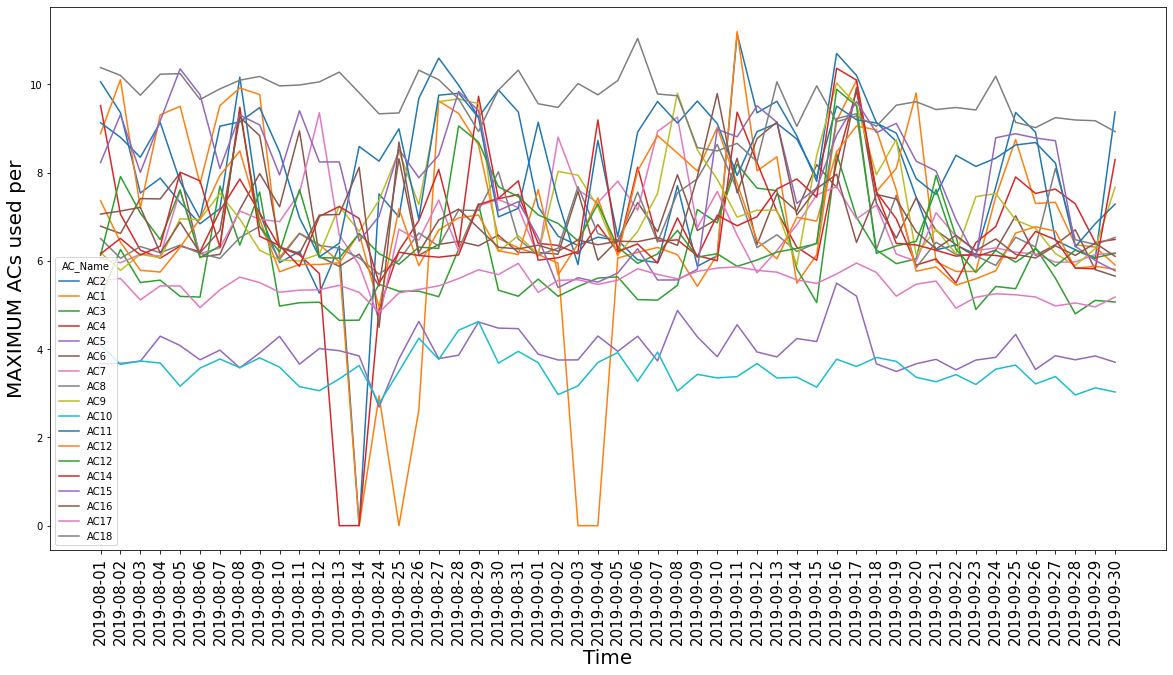

In [121]:
#PLOTING THE MAXIMUM USAGE OF ALL AC'S DATA 
plt.figure(figsize=(20,10))
#plot each series
plt.xticks(rotation=90,fontsize=15)

plt.plot(data_n['AC2'],label='AC2')
plt.plot(data_n['AC1'],label='AC1')
plt.plot(data_n['AC3'],label='AC3')
plt.plot(data_n['AC4'],label='AC4')
plt.plot(data_n['AC5'],label='AC5')
plt.plot(data_n['AC6'],label='AC6')
plt.plot(data_n['AC7'],label='AC7')
plt.plot(data_n['AC8'],label='AC8')
plt.plot(data_n['AC9'],label='AC9')
plt.plot(data_n['AC10'],label='AC10')
plt.plot(data_n['AC13'],label='AC11')
plt.plot(data_n['AC14'],label='AC12')
plt.plot(data_n['AC12'],label='AC12')
plt.plot(data_n['AC11'],label='AC14')
plt.plot(data_n['AC15'],label='AC15')
plt.plot(data_n['AC16'],label='AC16')
plt.plot(data_n['AC17'],label='AC17')
plt.plot(data_n['AC18'],label='AC18')

plt.legend(title='AC_Name')
plt.ylabel('MAXIMUM ACs used per', fontsize=20)
plt.xlabel('Time', fontsize=20)


In [122]:
#SUBPLOTTING MAXIMUM USAGE OF EACH AC'S FOR MORE CLEAR UNDERSTADING
fig = make_subplots(
    rows=10, cols=2,
    subplot_titles=("AC1", "AC2", "AC3", "AC4", "AC5", "AC6", "AC7", "AC8", "AC9", "AC10", "AC11", "AC12", "AC13", "AC14", "AC15", "AC16", "AC17", "AC18"))

fig.add_trace(go.Scatter(x=data_n.index,y=data_n.AC1),
              row=1, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC2),
              row=1, col=2)

fig.add_trace(go.Scatter(x=data_n.index, y=data_n.AC3),
              row=2, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC4),
              row=2, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC5),
              row=3, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=3, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=4, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC7),
              row=4, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC8),
              row=5, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC9),
              row=5, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC10),
              row=6, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC11),
              row=6, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC12),
              row=7, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC13),
              row=7, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC14),
              row=8, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC15),
              row=8, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC16),
              row=9, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC17),
              row=9, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC18),
              row=10, col=1)

fig.update_layout(height=1500, width=1700,
                  title_text="MAXIMUM USE OF AC'S PER DAY")

fig.show()

####Minimum use of AC's per day

In [123]:
# GENERATING THE MINIMUM OF EACH AC'S USAGES
minAC1=data.groupby('date')['AC1'].min()
minAC2=data.groupby('date')['AC2'].min()
minAC3=data.groupby('date')['AC3'].min()
minAC4=data.groupby('date')['AC4'].min()
minAC5=data.groupby('date')['AC5'].min()
minAC6=data.groupby('date')['AC6'].min()
minAC7=data.groupby('date')['AC7'].min()
minAC8=data.groupby('date')['AC8'].min()
minAC9=data.groupby('date')['AC9'].min()
minAC10=data.groupby('date')['AC10'].min()
minAC11=data.groupby('date')['AC11'].min()
minAC12=data.groupby('date')['AC12'].min()
minAC13=data.groupby('date')['AC13'].min()
minAC14=data.groupby('date')['AC14'].min()
minAC15=data.groupby('date')['AC15'].min()
minAC16=data.groupby('date')['AC16'].min()
minAC17=data.groupby('date')['AC17'].min()
minAC18=data.groupby('date')['AC18'].min()

In [124]:
#CONCATINATING MINIMUM USAGE OF AC'S DATA TO SINGLE 
data_n=pd.concat([minAC1, minAC2,minAC3,minAC4,minAC5,minAC6, minAC7,minAC8,minAC9,minAC10,minAC11, minAC12,minAC13,minAC14,minAC15,minAC16,minAC17,minAC18], axis=1)


Text(0.5, 0, 'Time')

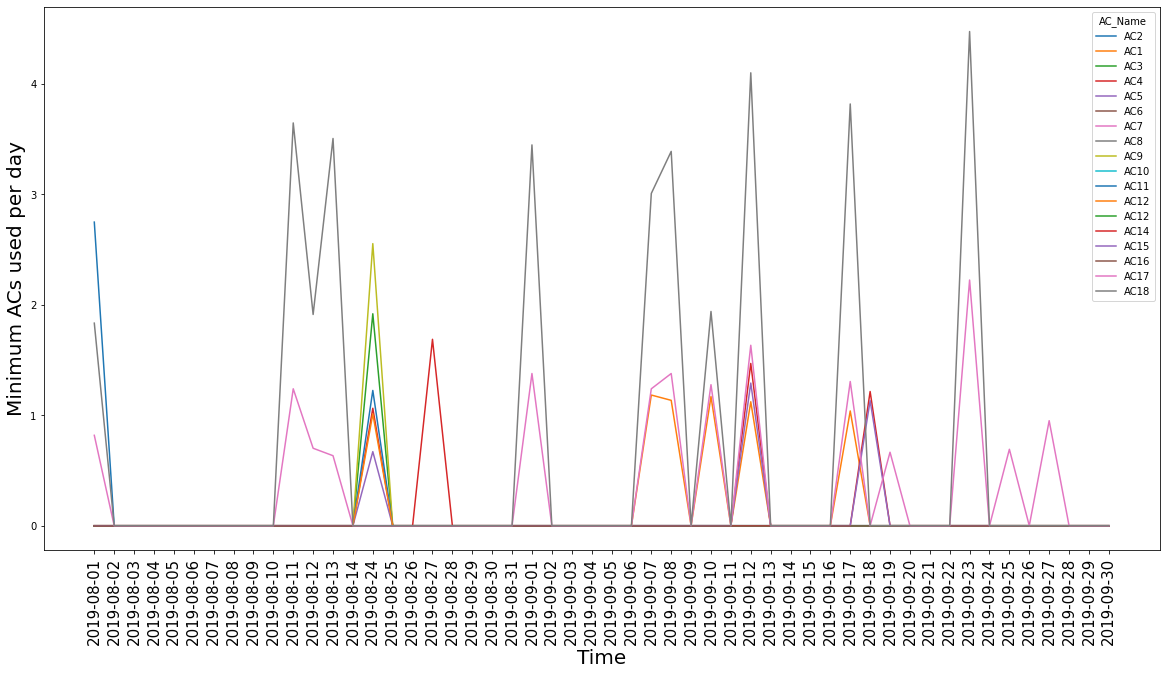

In [125]:
#PLOTING THE MINIMUM USAGE OF ALL AC'S DATA
plt.figure(figsize=(20,10))
#plot each series
plt.xticks(rotation=90,fontsize=15)

plt.plot(data_n['AC2'],label='AC2')
plt.plot(data_n['AC1'],label='AC1')
plt.plot(data_n['AC3'],label='AC3')
plt.plot(data_n['AC4'],label='AC4')
plt.plot(data_n['AC5'],label='AC5')
plt.plot(data_n['AC6'],label='AC6')
plt.plot(data_n['AC7'],label='AC7')
plt.plot(data_n['AC8'],label='AC8')
plt.plot(data_n['AC9'],label='AC9')
plt.plot(data_n['AC10'],label='AC10')
plt.plot(data_n['AC13'],label='AC11')
plt.plot(data_n['AC14'],label='AC12')
plt.plot(data_n['AC12'],label='AC12')
plt.plot(data_n['AC11'],label='AC14')
plt.plot(data_n['AC15'],label='AC15')
plt.plot(data_n['AC16'],label='AC16')
plt.plot(data_n['AC17'],label='AC17')
plt.plot(data_n['AC18'],label='AC18')

plt.legend(title='AC_Name')
plt.ylabel('Minimum ACs used per day', fontsize=20)
plt.xlabel('Time', fontsize=20)


In [126]:
#SUBPLOTTING MAXIMUM USAGE OF EACH AC'S FOR MORE CLEAR UNDERSTADING
fig = make_subplots(
    rows=10, cols=2,
    subplot_titles=("AC1", "AC2", "AC3", "AC4", "AC5", "AC6", "AC7", "AC8", "AC9", "AC10", "AC11", "AC12", "AC13", "AC14", "AC15", "AC16", "AC17", "AC18"))

fig.add_trace(go.Scatter(x=data_n.index,y=data_n.AC1),
              row=1, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC2),
              row=1, col=2)

fig.add_trace(go.Scatter(x=data_n.index, y=data_n.AC3),
              row=2, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC4),
              row=2, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC5),
              row=3, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=3, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=4, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC7),
              row=4, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC8),
              row=5, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC9),
              row=5, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC10),
              row=6, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC11),
              row=6, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC12),
              row=7, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC13),
              row=7, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC14),
              row=8, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC15),
              row=8, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC16),
              row=9, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC17),
              row=9, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC18),
              row=10, col=1)

fig.update_layout(height=1500, width=1700,
                  title_text="MINIMUM USE OF AC'S PER DAY")

fig.show()

####TOTAL USAGE OF AC'S PER DAY

In [37]:
# GENERATING THE TOTAL USAGE OF EACH AC'S 
totsumac1=data.groupby('date')['AC1'].sum()
totsumac2=data.groupby('date')['AC2'].sum()
totsumac3=data.groupby('date')['AC3'].sum()
totsumac4=data.groupby('date')['AC4'].sum()
totsumac5=data.groupby('date')['AC5'].sum()
totsumac6=data.groupby('date')['AC6'].sum()
totsumac7=data.groupby('date')['AC7'].sum()
totsumac8=data.groupby('date')['AC8'].sum()
totsumac9=data.groupby('date')['AC9'].sum()
totsumac10=data.groupby('date')['AC10'].sum()
totsumac11=data.groupby('date')['AC11'].sum()
totsumac12=data.groupby('date')['AC12'].sum()
totsumac13=data.groupby('date')['AC13'].sum()
totsumac14=data.groupby('date')['AC14'].sum()
totsumac15=data.groupby('date')['AC15'].sum()
totsumac16=data.groupby('date')['AC16'].sum()
totsumac17=data.groupby('date')['AC17'].sum()
totsumac18=data.groupby('date')['AC18'].sum()

In [38]:
#CONCATINATING TOTAL USAGE OF AC'S DATA TO SINGLE 
data_n=pd.concat([totsumac1, totsumac2,totsumac3,totsumac4,totsumac5,totsumac6, totsumac7,totsumac8,totsumac9,totsumac10,totsumac11, totsumac12,totsumac13,totsumac14,totsumac15,totsumac16,totsumac17,totsumac18], axis=1)


Text(0.5, 0, 'Time')

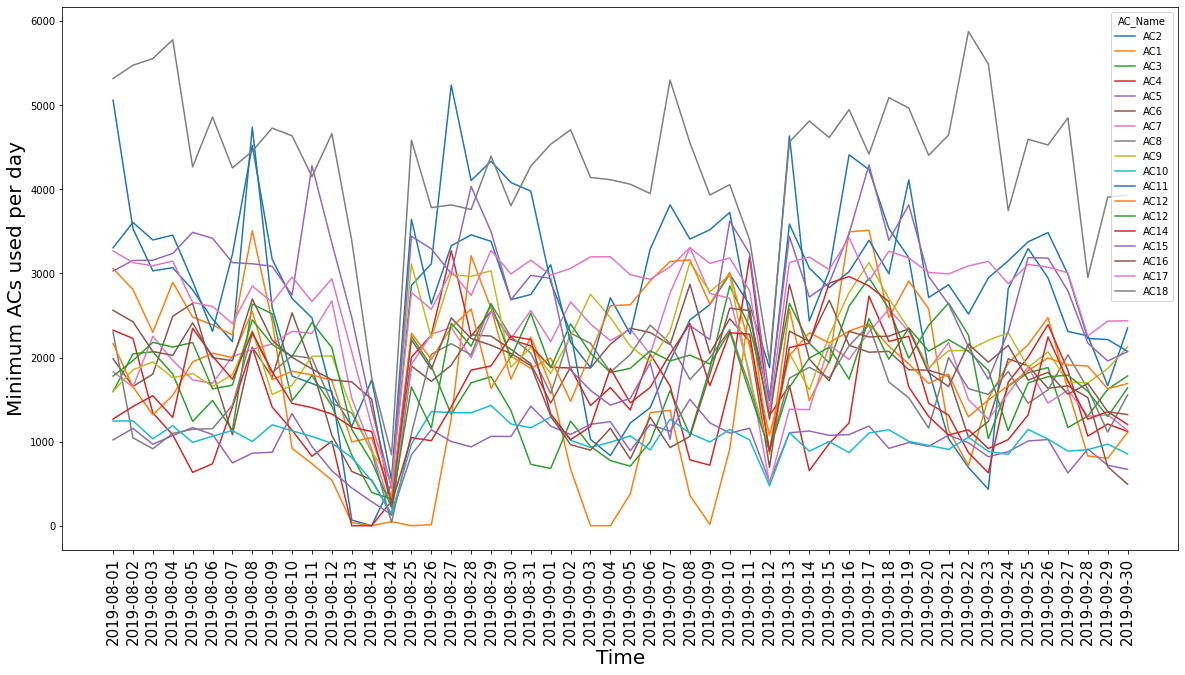

In [39]:
#PLOTING THE TOTAL USAGE OF ALL AC'S DATA
plt.figure(figsize=(20,10))
#plot each series
plt.xticks(rotation=90,fontsize=15)

plt.plot(data_n['AC2'],label='AC2')
plt.plot(data_n['AC1'],label='AC1')
plt.plot(data_n['AC3'],label='AC3')
plt.plot(data_n['AC4'],label='AC4')
plt.plot(data_n['AC5'],label='AC5')
plt.plot(data_n['AC6'],label='AC6')
plt.plot(data_n['AC7'],label='AC7')
plt.plot(data_n['AC8'],label='AC8')
plt.plot(data_n['AC9'],label='AC9')
plt.plot(data_n['AC10'],label='AC10')
plt.plot(data_n['AC13'],label='AC11')
plt.plot(data_n['AC14'],label='AC12')
plt.plot(data_n['AC12'],label='AC12')
plt.plot(data_n['AC11'],label='AC14')
plt.plot(data_n['AC15'],label='AC15')
plt.plot(data_n['AC16'],label='AC16')
plt.plot(data_n['AC17'],label='AC17')
plt.plot(data_n['AC18'],label='AC18')

plt.legend(title='AC_Name')
plt.ylabel('TOTAL ACs used per day', fontsize=20)
plt.xlabel('Time', fontsize=20)

In [40]:
#SUBPLOTTING TOTAL USAGE OF EACH AC'S FOR MORE CLEAR UNDERSTADING
fig = make_subplots(
    rows=10, cols=2,
    subplot_titles=("AC1", "AC2", "AC3", "AC4", "AC5", "AC6", "AC7", "AC8", "AC9", "AC10", "AC11", "AC12", "AC13", "AC14", "AC15", "AC16", "AC17", "AC18"))

fig.add_trace(go.Scatter(x=data_n.index,y=data_n.AC1),
              row=1, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC2),
              row=1, col=2)

fig.add_trace(go.Scatter(x=data_n.index, y=data_n.AC3),
              row=2, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC4),
              row=2, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC5),
              row=3, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=3, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC6),
              row=4, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC7),
              row=4, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC8),
              row=5, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC9),
              row=5, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC10),
              row=6, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC11),
              row=6, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC12),
              row=7, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC13),
              row=7, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC14),
              row=8, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC15),
              row=8, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC16),
              row=9, col=1)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC17),
              row=9, col=2)

fig.add_trace(go.Scatter(x=data_n.index ,y=data_n.AC18),
              row=10, col=1)

fig.update_layout(height=1500, width=1700,
                  title_text="TOTAL USAGE OF AC'S PER DAY")

fig.show()

In [ ]:
#@title 2.AC which is used the most/least


In [135]:
maxdata=[data['AC'+str(i)].sum() for i in range(1,19)]
accol=['AC'+str(i) for i in range(1,19)]

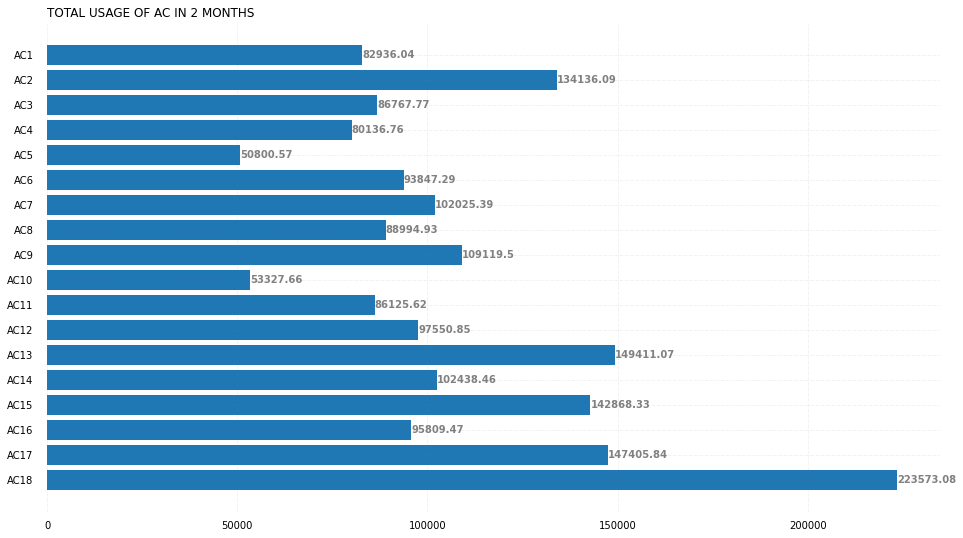

In [139]:
 # Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(accol, maxdata)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('TOTAL USAGE OF AC IN 2 MONTHS',
             loc ='left', )
  
# Show Plot
plt.show()

In [33]:
max1=0
for i in range(1,19):

  if(data['AC'+str(i)].sum() > max1):
    max1=data['AC'+str(i)].sum()
    ACname='AC'+str(i)

print(f'AC which is used the most is {ACname} around {max1} in 2 months ')

AC which is used the most is AC18 around 223573.07607886405 in 2 months 


In [34]:
min1=1111111111111111
for i in range(1,19):
  if(data['AC'+str(i)].sum() < min1):
    min1=data['AC'+str(i)].sum()
    ACname='AC'+str(i)
print(f'AC which is used the least is {ACname} around {min1} in 2 months ')

AC which is used the least is AC5 around 50800.5698975077 in 2 months 
